# Impact Evaluation Analysis - Kenya Bridge Education Program 


## Preview

We will be using data from our Bridge Kenya programme. You can find that raw data in folder supplied (in Excel and Stata formats - feel free whichever format you prefer). We will ask you to complete tasks that involve four crucial skills for our data analyst:

(1) data cleaning, (2) calculation of key performance indicators (KPIs), (3) descriptive analysis, and (4) impact evaluation. 

## Some context

According to the datasets provided, our Bridge Kenya programme operates in 111 schools, in 7 provinces across 31 regions in Kenya. You will get anonymized data for ~13,000 pupils from grades 1-5 from the end of an undisclosed school term in the past five years. (Note that each school year has three terms, and they consist of ~3-3.5 months each). 

## The data you received

You have received four files, all in .dta and .xlsx formats, so you can use whichever format you prefer. These files are the following: 

● **“Lesson completion”:** file provided at the teacher level, meaning that there is a unique row for each teacher. The file contains the grade that each teacher teaches, and the average lesson completion rate over the term of interest.

● **“Pupil attendance”:** file provided at the pupil level (that means that there is a unique row for each pupil). This file includes the unique school ID, unique pupil ID, the pupil’s grade, the attendance records, and the present records.

○ The attendance records means the total number of times that a pupil’s teacher took attendance.
○ The present records means the total number of times that a pupil was present, out of the attendance records. 

● **“Pupil scores”:** file provided at the pupil*subject level (that means that there are more than one row per pupil). This file includes the unique school ID, unique pupil ID, the pupil’s grade, the subject for this assessment, and the score obtained in this assessment.

● **“School information”:** file provided at the school-level. It includes the region and province where each school is located, the unique school ID, and the “treatment status” (yes/no) for a given tutoring 
program.

### Step 1: Data cleaning 

Please create a file at the student-level which has information about their test scores, school information, their attendance, and their teacher’s lesson completion rate. Note that this is the main data set that we expect you to share with us

**Hint**: note that the four data sets you will use are all presented at different “levels” of the data (e.g., “School information” is at the level of the school, but “Pupil scores” is at the level of the student). Therefore, we suggest that you start by reshaping the “Pupil scores” file so that each student only has one row in the data, with different columns for their scores in math, fluency, and Kiswahili. Use this as your “base file”, and start merging all the other files to this. Be careful with how you merge things: since there are many students to a school or even a teacher, some of these merges will need to be “many-toone” (but not all).

### Step 2: Calculating KPIs 

One of our main KPIs within the Schools Vertical is “Percent Pupils Present”. The “layman’s definition” of this KPI is “The percentage of pupils who were present, out of all pupils - across all days in the term to date ”. In other words, the percentage of pupils who were present (for each pupil in the “Pupil attendance” file, this is displayed in the “present_records” variable), out of pupils who had attendance records (the “attendance_records” variable in the same file).

● The first task is to translate this KPI into the data. We will calculate this KPI in two different ways. First, calculate this KPI for all pupils at once. What is the network-level average Percent Pupils Present (use two decimal points)?

● Now, please calculate this percentage for each school, and create an average at the school-level. What is the average Percent Pupils Present now (use two decimal points)?

● How does the interpretation of the KPI change between the two approaches? Does it matter in this case? When would it matter, (i.e., when would one be more appropriate than the other?) 2-4 sentences max.

### Step 3: Descriptives Analysis

Let’s dig into the reading fluency scores in your current data set. These came from the “Pupil scores” data, but you will need the data set you created in Step 1 above to answer these questions. Please answer the following questions as succinctly as possible.

● Please create a figure or a table, whichever you prefer, which shows average fluency scores for each of the five grades.

● Which regions (using the “region” variable) have the lowest and highest average fluency score across all grades?

● Please create a binary variable that is 1 if a given child reads at 10 or lower, and 0 otherwise. Please create a bar chart with grades on the x-axis, and the share of pupils scoring under this threshold for each grade. 

● What school has the highest share of pupils scoring under this threshold in grade 3?


### Step 4: Impact evaluation 

During this term, we rolled out an intensive after-school tutoring program in 55 schools. The selection to be a part of the 55 schools was randomly assigned - in other words, these schools were part of a randomized controlled trial (RCT). The “School Information” data set has a binary variable for whether each school was part of the program or not. 

● Our Chief Academic Officer would like to know whether this program had any effects on test scores in math, Kiswahili, fluency, and/or student attendance. Please conduct any calculations you see fit to answer his questions.

● After conducting the impact evaluation, we have heard anecdotally that teachers in schools that received tutoring felt more motivated and were completing their lessons at a faster pace. Hence, we could worry that the effects that we see are not (solely) due to the tutoring program, but also due to the higher lesson completion rate. Does this hypothesis hold up in the data?

# My Approaches to solving the case study:

1. Data Cleaning

2. Calculating KPIs

3. Descriptive Analytics

4. Impact Evaluation

## 1. Data Cleaning

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the datasets
pupil_scores = pd.read_excel(r"C:\Users\user\Downloads\Pupil scores.xlsx")
lesson_completion = pd.read_excel(r"C:\Users\user\Downloads\Lesson completion.xlsx")
school_information = pd.read_excel(r"C:\Users\user\Downloads\School_information.xlsx")
pupil_attendance = pd.read_excel(r"C:\Users\user\Downloads\Pupil attendance.xlsx")

In [3]:
# Assign the data to ne variables
df1 = pupil_scores
df2 = lesson_completion
df3 = school_information
df4 = pupil_attendance

# View the data
print(df1.head())

print("----------")

print(df2.head())

print("----------")

print(df3.head())

print("----------")

print(df4.head())

   school_id  pupil_id    grade    subject      score
0      35175         1  Grade 1    Fluency  65.000000
1      35175         1  Grade 1  Kiswahili   0.942857
2      35175         1  Grade 1       Math   1.000000
3      40580         7  Grade 2       Math   0.933333
4      40580         7  Grade 2  Kiswahili   0.942857
----------
   school_id  teacher_id    grade  lesson_completion_rate
0        416         505  Grade 1                0.568401
1        416         202  Grade 2                0.680608
2        416         124  Grade 3                0.250460
3        416         516  Grade 4                0.359155
4        416         145  Grade 5                0.396761
----------
    region province  school_id tutoring_program
0  Mombasa    Coast     136992               No
1   Kilifi    Coast     687400              Yes
2  Mombasa    Coast     609982              Yes
3  Eastern  Eastern     223941               No
4   Isiolo  Eastern      34092               No
----------
   scho

In [4]:
# Work with the base data (df1)
# Check the df1 closely
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37947 entries, 0 to 37946
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   school_id  37947 non-null  int64  
 1   pupil_id   37947 non-null  int64  
 2   grade      37947 non-null  object 
 3   subject    37947 non-null  object 
 4   score      36164 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ MB


In [5]:
# Check df1 data types
df1.dtypes

school_id      int64
pupil_id       int64
grade         object
subject       object
score        float64
dtype: object

In [6]:
df1.describe()

,school_id,pupil_id,score
count,37947.000000,37947.000000,36164.000000
mean,277150.510528,13528.227212,38.194682
std,250287.520437,7811.269673,67.451412
min,416.000000,1.000000,0.000000
25%,49404.000000,6698.000000,0.685714
50%,226128.000000,13506.000000,0.924888
75%,406350.000000,20281.500000,56.000000
max,991980.000000,27063.000000,383.000000


In [7]:
# check for null values
df1.isnull().sum()

school_id       0
pupil_id        0
grade           0
subject         0
score        1783
dtype: int64

**The null values in df1 will be dealt with during analysis in order to get accurate results**

In [8]:
# View df1 
df1

,school_id,pupil_id,grade,subject,score
0,35175,1,Grade 1,Fluency,65.000000
1,35175,1,Grade 1,Kiswahili,0.942857
2,35175,1,Grade 1,Math,1.000000
3,40580,7,Grade 2,Math,0.933333
4,40580,7,Grade 2,Kiswahili,0.942857
...,...,...,...,...,...
37942,39078,27062,Grade 1,Math,0.300000
37943,39078,27062,Grade 1,Fluency,30.000000
37944,223941,27063,Grade 5,Math,0.720000
37945,223941,27063,Grade 5,Fluency,185.000000


In [9]:
# Check the shape of df1
df1.shape

(37947, 5)

In [10]:
# Size of df1
df1.size

189735

In [11]:
# Change the df1 from long to wide format on 'subject' and 'scores'
# in order to have a single observation for each pupil
df1 = df1.pivot_table(index = ['school_id', 'pupil_id', 'grade'], 
                      columns = 'subject', 
                      values = 'score',
                     aggfunc = 'first').reset_index()

# View df1
df1

subject,school_id,pupil_id,grade,Fluency,Kiswahili,Math
0,416,344,Grade 2,41.0,0.600000,0.466667
1,416,354,Grade 2,47.0,0.800000,0.633333
2,416,1430,Grade 1,20.0,0.171429,0.400000
3,416,1642,Grade 5,68.0,0.775000,0.680000
4,416,1980,Grade 1,40.0,0.457143,1.000000
...,...,...,...,...,...,...
12189,991980,25716,Grade 2,105.0,1.000000,0.761969
12190,991980,26623,Grade 4,202.0,0.738017,0.620000
12191,991980,26762,Grade 4,225.0,0.695856,0.480000
12192,991980,26901,Grade 3,256.0,0.523312,1.000000


In [12]:
# Rename columns for better clarity
df1.columns.name = None # Remove the 'subject' label
df1 = df1.rename_axis(columns = None)

# View df1
df1

,school_id,pupil_id,grade,Fluency,Kiswahili,Math
0,416,344,Grade 2,41.0,0.600000,0.466667
1,416,354,Grade 2,47.0,0.800000,0.633333
2,416,1430,Grade 1,20.0,0.171429,0.400000
3,416,1642,Grade 5,68.0,0.775000,0.680000
4,416,1980,Grade 1,40.0,0.457143,1.000000
...,...,...,...,...,...,...
12189,991980,25716,Grade 2,105.0,1.000000,0.761969
12190,991980,26623,Grade 4,202.0,0.738017,0.620000
12191,991980,26762,Grade 4,225.0,0.695856,0.480000
12192,991980,26901,Grade 3,256.0,0.523312,1.000000


In [13]:
# Compare df1 and df4
print(df1.head())

print("-------------")

print(df4.head())

   school_id  pupil_id    grade  Fluency  Kiswahili      Math
0        416       344  Grade 2     41.0   0.600000  0.466667
1        416       354  Grade 2     47.0   0.800000  0.633333
2        416      1430  Grade 1     20.0   0.171429  0.400000
3        416      1642  Grade 5     68.0   0.775000  0.680000
4        416      1980  Grade 1     40.0   0.457143  1.000000
-------------
   school_id  pupil_id    grade  attendance_records  present_records
0      35175         1  Grade 1                  91               69
1      40580         7  Grade 2                  92               86
2       9342         8  Grade 5                  43               39
3     858450        10  Grade 5                  86               62
4        792        13  Grade 3                 104               81


In [14]:
# Merge df1 with df4 on similar columns
merged_data = pd.merge(df1, df4, on = ['school_id', 'pupil_id', 'grade'], how = 'inner')
merged_data

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90
2,416,1430,Grade 1,20.0,0.171429,0.400000,85,65
3,416,1642,Grade 5,68.0,0.775000,0.680000,86,56
4,416,1980,Grade 1,40.0,0.457143,1.000000,85,74
...,...,...,...,...,...,...,...,...
12189,991980,25716,Grade 2,105.0,1.000000,0.761969,73,61
12190,991980,26623,Grade 4,202.0,0.738017,0.620000,91,87
12191,991980,26762,Grade 4,225.0,0.695856,0.480000,91,48
12192,991980,26901,Grade 3,256.0,0.523312,1.000000,85,74


In [15]:
# Compare merged_data and df2
print(merged_data.head())

print("--------------")

print(df2.head())

   school_id  pupil_id    grade  Fluency  Kiswahili      Math  \
0        416       344  Grade 2     41.0   0.600000  0.466667   
1        416       354  Grade 2     47.0   0.800000  0.633333   
2        416      1430  Grade 1     20.0   0.171429  0.400000   
3        416      1642  Grade 5     68.0   0.775000  0.680000   
4        416      1980  Grade 1     40.0   0.457143  1.000000   

   attendance_records  present_records  
0                  85               77  
1                 102               90  
2                  85               65  
3                  86               56  
4                  85               74  
--------------
   school_id  teacher_id    grade  lesson_completion_rate
0        416         505  Grade 1                0.568401
1        416         202  Grade 2                0.680608
2        416         124  Grade 3                0.250460
3        416         516  Grade 4                0.359155
4        416         145  Grade 5                0.396761


In [16]:
# Merge the merged_data with df2 on similar columns
merged_data = pd.merge(merged_data, df2, on = ['school_id', 'grade'], how = 'inner')
merged_data

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,202,0.680608
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,202,0.680608
2,416,3333,Grade 2,41.0,0.514286,0.466667,102,76,202,0.680608
3,416,5690,Grade 2,36.0,0.685714,0.566667,102,96,202,0.680608
4,416,5692,Grade 2,40.0,0.742857,0.633333,102,82,202,0.680608
...,...,...,...,...,...,...,...,...,...,...
12189,991980,16847,Grade 5,184.0,1.000000,0.900000,85,81,105,0.404858
12190,991980,18238,Grade 5,155.0,0.811351,0.420000,85,71,105,0.404858
12191,991980,18429,Grade 5,165.0,1.000000,0.460000,85,79,105,0.404858
12192,991980,18924,Grade 5,204.0,1.000000,0.720000,85,84,105,0.404858


In [17]:
# Compare merged_data and df3
print(merged_data.head())

print("-------------")

print(df3)

   school_id  pupil_id    grade  Fluency  Kiswahili      Math  \
0        416       344  Grade 2     41.0   0.600000  0.466667   
1        416       354  Grade 2     47.0   0.800000  0.633333   
2        416      3333  Grade 2     41.0   0.514286  0.466667   
3        416      5690  Grade 2     36.0   0.685714  0.566667   
4        416      5692  Grade 2     40.0   0.742857  0.633333   

   attendance_records  present_records  teacher_id  lesson_completion_rate  
0                  85               77         202                0.680608  
1                 102               90         202                0.680608  
2                 102               76         202                0.680608  
3                 102               96         202                0.680608  
4                 102               82         202                0.680608  
-------------
         region province  school_id tutoring_program
0       Mombasa    Coast     136992               No
1        Kilifi    Coast   

In [18]:
# Merge the merged_data with df3 with similar column
merged_data = pd.merge(merged_data, df3, on = ['school_id'], how = 'inner')
merged_data

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,202,0.680608,Kirinyaga,Central,No
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,202,0.680608,Kirinyaga,Central,No
2,416,3333,Grade 2,41.0,0.514286,0.466667,102,76,202,0.680608,Kirinyaga,Central,No
3,416,5690,Grade 2,36.0,0.685714,0.566667,102,96,202,0.680608,Kirinyaga,Central,No
4,416,5692,Grade 2,40.0,0.742857,0.633333,102,82,202,0.680608,Kirinyaga,Central,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12189,991980,16847,Grade 5,184.0,1.000000,0.900000,85,81,105,0.404858,Kilifi,Coast,Yes
12190,991980,18238,Grade 5,155.0,0.811351,0.420000,85,71,105,0.404858,Kilifi,Coast,Yes
12191,991980,18429,Grade 5,165.0,1.000000,0.460000,85,79,105,0.404858,Kilifi,Coast,Yes
12192,991980,18924,Grade 5,204.0,1.000000,0.720000,85,84,105,0.404858,Kilifi,Coast,Yes


In [19]:
# Save the resultant merged_data in excel file
merged_data.to_excel("C:\\Users\\user\\Downloads\\merged_data_python.xlsx")

## 2. Calculating KPIs

In [20]:
# We use df4 to calculate the KPIs
# View df4
df4.head()

,school_id,pupil_id,grade,attendance_records,present_records
0,35175,1,Grade 1,91,69
1,40580,7,Grade 2,92,86
2,9342,8,Grade 5,43,39
3,858450,10,Grade 5,86,62
4,792,13,Grade 3,104,81


In [21]:
# Check for null values
df4.isnull().sum()

school_id             0
pupil_id              0
grade                 0
attendance_records    0
present_records       0
dtype: int64

**No null values in df4**

In [22]:
# Get more info about df4
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12701 entries, 0 to 12700
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   school_id           12701 non-null  int64 
 1   pupil_id            12701 non-null  int64 
 2   grade               12701 non-null  object
 3   attendance_records  12701 non-null  int64 
 4   present_records     12701 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 496.3+ KB


In [23]:
# descriptive stats
df4.describe()

,school_id,pupil_id,attendance_records,present_records
count,12701.000000,12701.000000,12701.000000,12701.000000
mean,276781.690576,13523.713723,82.290765,62.360365
std,250528.370121,7812.019490,21.718031,21.667290
min,416.000000,1.000000,1.000000,0.000000
25%,49404.000000,6695.000000,74.000000,46.000000
50%,223941.000000,13500.000000,90.000000,66.000000
75%,406350.000000,20277.000000,98.000000,80.000000
max,991980.000000,27063.000000,109.000000,107.000000


In [24]:
# Create a new variable 'percent_pupil_present' in df4
df4['percent_pupil_present'] = (df4['present_records'] / df4['attendance_records']) * 100
# View df4
df4

,school_id,pupil_id,grade,attendance_records,present_records,percent_pupil_present
0,35175,1,Grade 1,91,69,75.824176
1,40580,7,Grade 2,92,86,93.478261
2,9342,8,Grade 5,43,39,90.697674
3,858450,10,Grade 5,86,62,72.093023
4,792,13,Grade 3,104,81,77.884615
...,...,...,...,...,...,...
12696,34092,27057,Grade 3,27,22,81.481481
12697,687400,27059,Grade 3,91,88,96.703297
12698,314160,27061,Grade 3,107,100,93.457944
12699,39078,27062,Grade 1,91,80,87.912088


* **Network-level Average Percent Pupils Present**

In [25]:
# Aggregate df4 by finding the mean of percent_pupil_present
avg_percent_pupil_present = df4['percent_pupil_present'].mean()

# Print the result in 2 decimal places
print(f'Network-level Average Percent Pupil Present: {avg_percent_pupil_present: .2f}%')

Network-level Average Percent Pupil Present:  75.93%


* **School-level Average Percent Pupils Present** 

In [26]:
# Aggregate df4 by grouping it by 'school_id', then find the average of percent_pupil_present
avg_percent_pupil_present_by_school = df4.groupby('school_id')['percent_pupil_present'].mean()
avg_percent_pupil_present_by_school

school_id
416       74.227153
792       75.603355
5502      67.880731
7956      76.410958
8084      68.450696
            ...    
864156    63.346934
909600    74.327975
958934    81.682400
963352    72.279893
991980    82.934158
Name: percent_pupil_present, Length: 111, dtype: float64

In [27]:
avg_percent_pupil_present_by_school = pd.DataFrame(avg_percent_pupil_present_by_school)
avg_percent_pupil_present_by_school

,percent_pupil_present
school_id,
416,74.227153
792,75.603355
5502,67.880731
7956,76.410958
8084,68.450696
...,...
864156,63.346934
909600,74.327975
958934,81.682400


In [31]:
# Find the school-level avg percent pupil present in 2 decimal places
avg_percent_pupil_present_by_school = avg_percent_pupil_present_by_school.mean()
avg_percent_pupil_present_by_school

75.84776745749275

In [32]:
# Find the avg_percent_pupil_presnt_by_school in 2 decimal places
print(f"School-level Average Average Percent Pupils Present: {avg_percent_pupil_present_by_school:.2f}%")

School-level Average Average Percent Pupils Present: 75.85%


## 3. Descriptive Analysis

In [33]:
# Import the merged_data in step 1 to perform DA
merged_data = pd.read_excel(r'C:\Users\user\Downloads\merged_data_python.xlsx', index_col = 0)

# Display the first 5 rows
merged_data.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,202,0.680608,Kirinyaga,Central,No
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,202,0.680608,Kirinyaga,Central,No
2,416,3333,Grade 2,41.0,0.514286,0.466667,102,76,202,0.680608,Kirinyaga,Central,No
3,416,5690,Grade 2,36.0,0.685714,0.566667,102,96,202,0.680608,Kirinyaga,Central,No
4,416,5692,Grade 2,40.0,0.742857,0.633333,102,82,202,0.680608,Kirinyaga,Central,No


* **Average fluency scores for each of the five grades**

In [34]:
# Find Average fluency scores for each of the five grades
# Group the data by 'grade' and find the average of 'Fluency'
avg_fluency_by_grade = merged_data.groupby('grade')['Fluency'].mean()
avg_fluency_by_grade

grade
Grade 1     53.084650
Grade 2    104.396565
Grade 3    127.391393
Grade 4    145.473339
Grade 5    154.934010
Name: Fluency, dtype: float64

In [35]:
# Sort in descending order
avg_fluency_by_grade = pd.DataFrame(avg_fluency_by_grade)
avg_fluency_by_grade_sorted = avg_fluency_by_grade.sort_values(by='grade', ascending=False)
avg_fluency_by_grade_sorted

,Fluency
grade,
Grade 5,154.934010
Grade 4,145.473339
Grade 3,127.391393
Grade 2,104.396565
Grade 1,53.084650


* **Which regions (using the “region” variable) have the lowest and highest average fluency score across all grades?**

In [36]:
# Group merged_data by 'region' & calcualte the avg. 'FLuency' scores
avg_fluency_by_region = merged_data.groupby('region')['Fluency'].mean()

# Find the region with lowest average fluency score
lowest_avg_fluency_region = avg_fluency_by_region.idxmin()
lowest_avg_fluency_score = avg_fluency_by_region.min()

# Find the region with highest fluency score
highest_avg_fluency_region = avg_fluency_by_region.idxmax()
highest_avg_fluency_score = avg_fluency_by_region.max()

# Print results
print("Region with the lowest fluency score: ", lowest_avg_fluency_region)
print(f"Lowest average fluency score: {lowest_avg_fluency_score:.2f}")

print("\nRegion with the highest fluency score: ", highest_avg_fluency_region)
print(f"Highest average fluency score: { highest_avg_fluency_score:.2f}")

Region with the lowest fluency score:  Kirinyaga
Lowest average fluency score: 60.31

Region with the highest fluency score:  Machakos
Highest average fluency score: 157.76


* **Please create a binary variable that is 1 if a given child reads at 10 or lower, and 0 otherwise.**

In [37]:
# Create a binary variable indicating whether a child reads at 10 or lower
merged_data['reads_10_or_lower'] = (merged_data['Fluency'] <= 10).astype(int)
# Check updated merged_data
merged_data.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,reads_10_or_lower
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,202,0.680608,Kirinyaga,Central,No,0
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,202,0.680608,Kirinyaga,Central,No,0
2,416,3333,Grade 2,41.0,0.514286,0.466667,102,76,202,0.680608,Kirinyaga,Central,No,0
3,416,5690,Grade 2,36.0,0.685714,0.566667,102,96,202,0.680608,Kirinyaga,Central,No,0
4,416,5692,Grade 2,40.0,0.742857,0.633333,102,82,202,0.680608,Kirinyaga,Central,No,0


In [38]:
# Group the data by grade & calculate the share of pupils scoring under the threshold for each grade
share_below_threshold = merged_data.groupby('grade')['reads_10_or_lower'].mean()
share_below_threshold

grade
Grade 1    0.109253
Grade 2    0.034039
Grade 3    0.022349
Grade 4    0.016034
Grade 5    0.008876
Name: reads_10_or_lower, dtype: float64

* **Please create a bar chart with grades on the x-axis, and the share of pupils scoring under this threshold for each grade.**

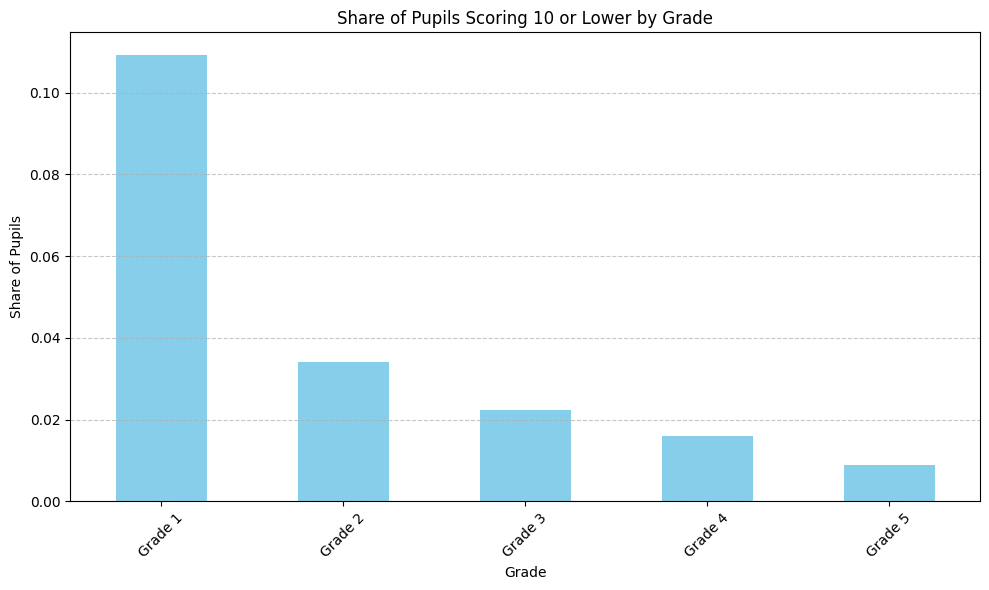

In [39]:
# Create bar chat
plt.figure(figsize =(10, 6))
share_below_threshold.plot(kind='bar', color='skyblue')
plt.title("Share of Pupils Scoring 10 or Lower by Grade")
plt.xlabel('Grade')
plt.ylabel('Share of Pupils')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle = '--', alpha=0.7)
plt.tight_layout()
plt.show()

* **What school has the highest share of pupils scoring under this threshold in grade 3?**

In [40]:
# Filter data for grade 3
grade_3_data = merged_data[merged_data['grade'] == 'Grade 3']

# Group grade_3_data by 'school_id' and calculate the share of pupils scoring under the threshold for grade 3
share_below_threshold_grade_3 = grade_3_data.groupby('school_id')['reads_10_or_lower'].mean()
share_below_threshold_grade_3

school_id
416       0.125000
792       0.000000
5502      0.000000
7956      0.000000
8084      0.115385
            ...   
864156    0.000000
909600    0.000000
958934    0.000000
963352    0.000000
991980    0.000000
Name: reads_10_or_lower, Length: 111, dtype: float64

In [41]:
# Find the school with the highest share of pupils scoring under the threshold in grade 3
highest_share_school_grade_3 = share_below_threshold_grade_3.idxmax()
highest_share = share_below_threshold_grade_3.max()

# Print the results
print("School with the highest share of pupils scoring under the threshold in grade 3: ", highest_share_school_grade_3)
print(f"Highest share of pupils scoring under the threshod in grade 3: {highest_share:.2f}")

School with the highest share of pupils scoring under the threshold in grade 3:  223941
Highest share of pupils scoring under the threshod in grade 3: 0.33


## 4. Impact Evaluation

* **Confirm whether this program had any effects on test scores in math, Kiswahili, fluency, and/or student attendance. Please conduct any calculations you see fit to answer his questions.**

In [42]:
# We'll use the merged_data to conduct impact evalutation
# View the first 5 rows of merged_data
merged_data.head()

,school_id,pupil_id,grade,Fluency,Kiswahili,Math,attendance_records,present_records,teacher_id,lesson_completion_rate,region,province,tutoring_program,reads_10_or_lower
0,416,344,Grade 2,41.0,0.600000,0.466667,85,77,202,0.680608,Kirinyaga,Central,No,0
1,416,354,Grade 2,47.0,0.800000,0.633333,102,90,202,0.680608,Kirinyaga,Central,No,0
2,416,3333,Grade 2,41.0,0.514286,0.466667,102,76,202,0.680608,Kirinyaga,Central,No,0
3,416,5690,Grade 2,36.0,0.685714,0.566667,102,96,202,0.680608,Kirinyaga,Central,No,0
4,416,5692,Grade 2,40.0,0.742857,0.633333,102,82,202,0.680608,Kirinyaga,Central,No,0


In [43]:
# check for null values
merged_data.isnull().sum()

school_id                   0
pupil_id                    0
grade                       0
Fluency                   218
Kiswahili                  93
Math                      107
attendance_records          0
present_records             0
teacher_id                  0
lesson_completion_rate      0
region                      0
province                    0
tutoring_program            0
reads_10_or_lower           0
dtype: int64

In [44]:
# Drop the null values in 'Fluency', 'Kiswahili', and 'Math' to get accurate average scores
merged_data.dropna(subset=['Fluency'], inplace=True)
merged_data.dropna(subset=['Kiswahili'], inplace=True)
merged_data.dropna(subset=['Math'], inplace=True)

# check for null values again
merged_data.isnull().sum()

school_id                 0
pupil_id                  0
grade                     0
Fluency                   0
Kiswahili                 0
Math                      0
attendance_records        0
present_records           0
teacher_id                0
lesson_completion_rate    0
region                    0
province                  0
tutoring_program          0
reads_10_or_lower         0
dtype: int64

In [45]:
# Filter data based on whether the schools are part of the tutoring program or not
tutoring_program_yes = merged_data[merged_data['tutoring_program'] == 'Yes']
tutoring_program_no = merged_data[merged_data['tutoring_program'] == 'No']

# Calculate average scores and attendance for 'yes' and 'no' for tutoring program
avg_scores_tutoring_program_yes = tutoring_program_yes[['Fluency', 'Kiswahili', 'Math', 'attendance_records']].mean()
avg_scores_tutoring_program_no = tutoring_program_no[['Fluency', 'Kiswahili', 'Math', 'attendance_records']].mean()

# Print the results
print("Average scores and attendance for schools with tutoring program: ", avg_scores_tutoring_program_yes)
print("Average scores and attendance for schools without tutoring program: ", avg_scores_tutoring_program_no)

Average scores and attendance for schools with tutoring program:  Fluency               130.197300
Kiswahili               0.807444
Math                    0.744896
attendance_records     82.855191
dtype: float64
Average scores and attendance for schools without tutoring program:  Fluency               97.378540
Kiswahili              0.680282
Math                   0.706767
attendance_records    82.340839
dtype: float64


**Based on the results above, the tutoring program had effects on test scores in Fluency, Kiswahili, Math and student attendance**

* **After conducting the impact evaluation, we have heard anecdotally that teachers in schools that received tutoring felt more motivated and were completing their lessons at a faster pace. Hence, we could worry that the effects that we see are not (solely) due to the tutoring program, but also due to the higher lesson completion rate. Does this hypothesis hold up in the data?**

In [46]:
# We'll still use the merged_data to confirm if the hypothesis hod up in the data or not

# Group data by lesson completion rate and tutoring program
grouped_data = merged_data.groupby(['tutoring_program', pd.cut(merged_data['lesson_completion_rate'], bins=2, 
                                                               labels=['Low', 'High'])])

# Calculate average scores and attendance for each group
avg_scores_attendance_by_group = grouped_data[['Fluency', 'Kiswahili', 'Math', 'attendance_records']].mean()

# Print results
print("Average scores and attendance by tutoring program and lesson completion rate:")
print(avg_scores_attendance_by_group)

Average scores and attendance by tutoring program and lesson completion rate:
                                            Fluency  Kiswahili      Math  \
tutoring_program lesson_completion_rate                                    
No               Low                     106.163677   0.662599  0.654249   
                 High                     93.535311   0.688018  0.729742   
Yes              Low                     143.383362   0.786841  0.694085   
                 High                    124.903783   0.815715  0.765294   

                                         attendance_records  
tutoring_program lesson_completion_rate                      
No               Low                              70.542601  
                 High                             87.502207  
Yes              Low                              70.129727  
                 High                             87.963802  


* **There's an effect of lesson completion rate on the scores and attendance record, apart from Fluency. Therefore the hypothesis holds up in the data that the effects on the scores and attendance records are not solely due to the tutoring program, nut also due to the higher completion rate, apart from Fluency which the lesson completion rate doesn't have an impact on.** 